<h1> Exploratory Data Analysis <span style="color: blue">(EDA) </span> in Python</h1>
<p> <b>Exploratory data analysis<span style="color: blue">(EDA)</span> :</b> is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods It can also help determine if the statistical techniques you are considering for data analysis are appropriate</p>

<h2>Steps in Exploratory Data Analysis <span style="color: blue">(EDA):</h2>
    <ul>
    <li> Understand the Data</li>
    <li> Clean the Data</li>
    <li> Analyzing Relationships</li>
    </ul>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### Understand the Data

In [19]:
passengers = pd.read_csv("DATASETS/titanic.csv")
passengers .drop(["Cabin"], inplace=True, axis=1)
##view head
passengers .head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [20]:
##view tail
passengers.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [21]:
## Sumary Stats
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
## Shape of data
passengers.shape

(418, 11)

In [23]:
## Columns
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
passengers.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Embarked         3
dtype: int64

### Clean the Data

In [25]:
passengers.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,True,False,False,False,False,False


In [26]:
passengers.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


#### Split Column

In [45]:
first_name = passengers["Name"].str.split(",", expand=True)[0]
title = passengers["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[0]
last_name = passengers["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[1]

passengers["First Name"] = first_name
passengers["Title"]=title
passengers["Last Name"] =last_name

passengers.drop(["Name"], axis=1, inplace=True)
passengers.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Title,Last Name
0,892,0,3,male,34.5,0,0,330911,7.8292,Q,Kelly,Mr,James
1,893,1,3,female,47.0,1,0,363272,7.0000,S,Wilkes,Mrs,James (Ellen Needs)
2,894,0,2,male,62.0,0,0,240276,9.6875,Q,Myles,Mr,Thomas Francis
3,895,0,3,male,27.0,0,0,315154,8.6625,S,Wirz,Mr,Albert
4,896,1,3,female,22.0,1,1,3101298,12.2875,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist)


#### Remove Duplicates

In [46]:
passengers.drop_duplicates()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Title,Last Name
0,892,0,3,male,34.5,0,0,330911,7.8292,Q,Kelly,Mr,James
1,893,1,3,female,47.0,1,0,363272,7.0000,S,Wilkes,Mrs,James (Ellen Needs)
2,894,0,2,male,62.0,0,0,240276,9.6875,Q,Myles,Mr,Thomas Francis
3,895,0,3,male,27.0,0,0,315154,8.6625,S,Wirz,Mr,Albert
4,896,1,3,female,22.0,1,1,3101298,12.2875,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen
416,1308,0,3,male,NaN,0,0,359309,8.0500,S,Ware,Mr,Frederick


### Analyzing Relationships

#### COrrelation Matrix

<AxesSubplot:>

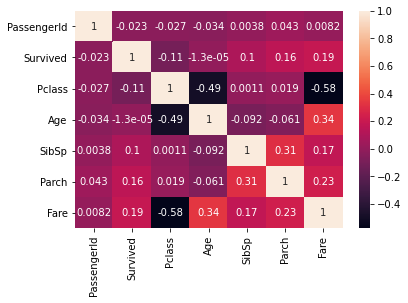

In [27]:
correlation = passengers.corr()
sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

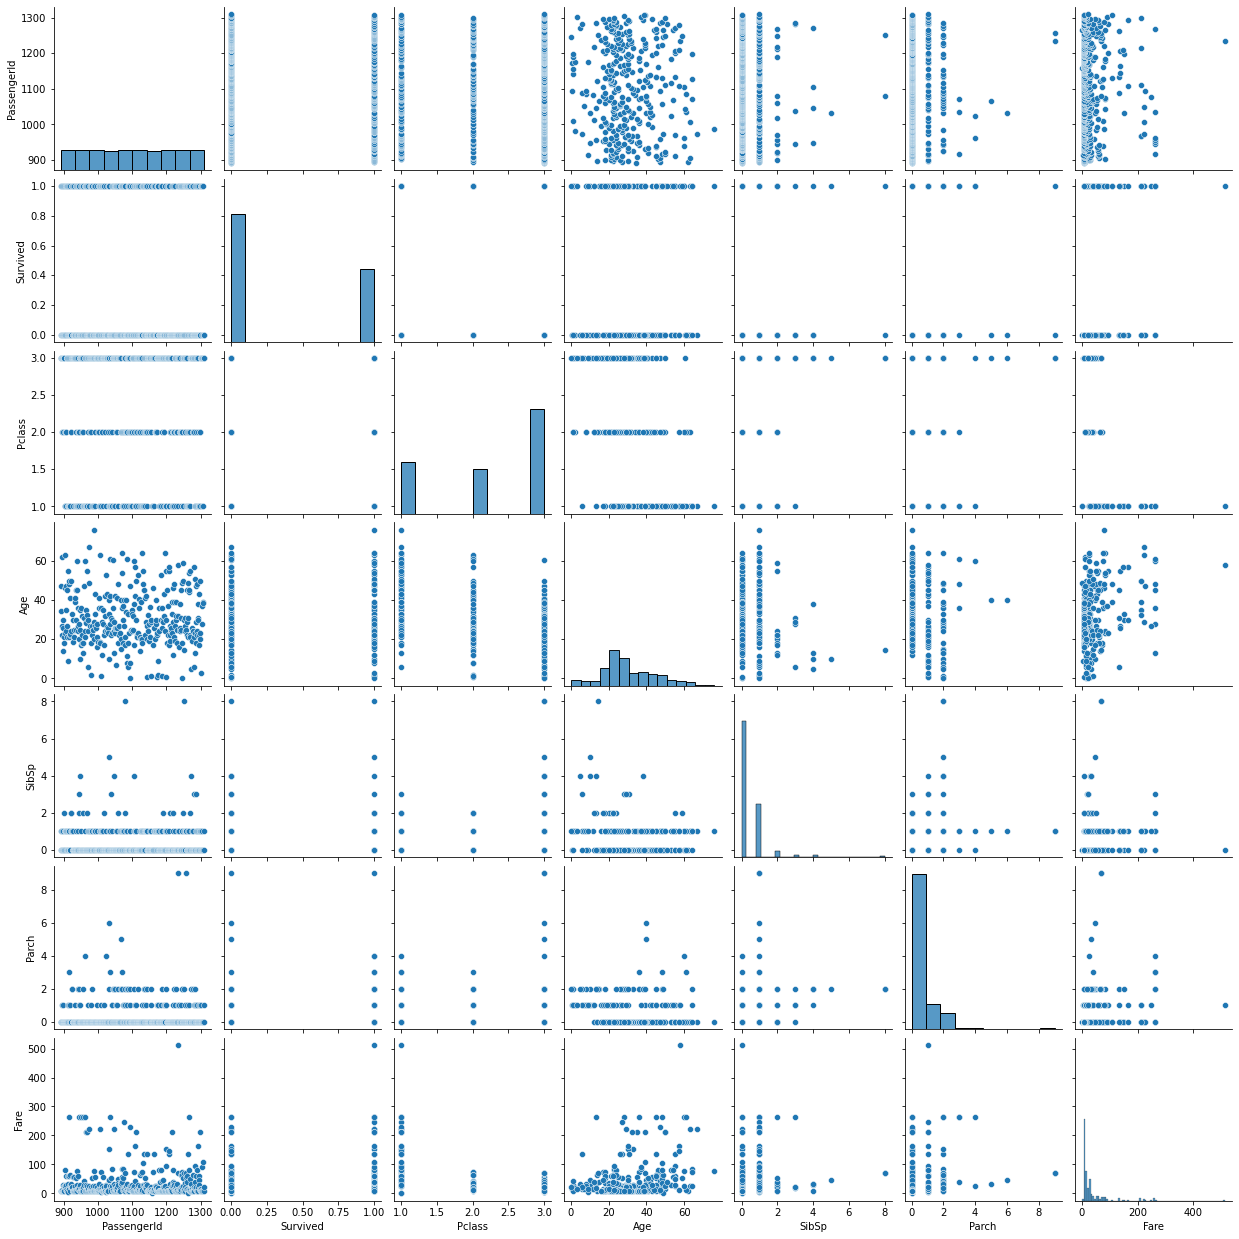

In [29]:
sn.pairplot(passengers)

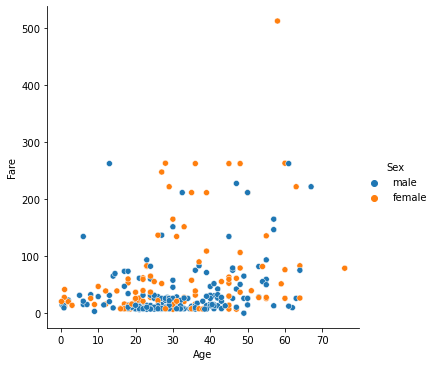

In [31]:
sn.relplot(x="Age", y="Fare", hue="Sex", data=passengers)

<AxesSubplot:xlabel='Age', ylabel='Count'>

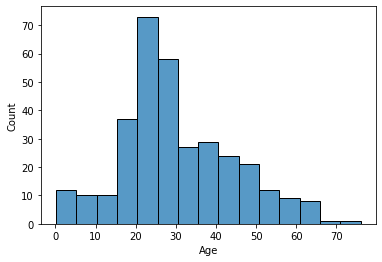

In [47]:
sn.histplot(passengers["Age"])

<AxesSubplot:ylabel='Age'>

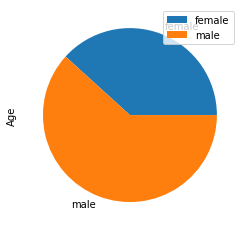

In [55]:
passengers.groupby(['Sex']).count().plot(kind='pie', y='Age')

<div style="text-align: center">
 Developed By <b>Ibrahim Aidaruz</b>
</div>